In [2]:
import os
import glob
import numpy as np
import pandas as pd

import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mimg
%matplotlib inline

from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Input data files are available in the "../input/" directory.
INPUT_PATH = "/content/drive/My Drive/chest_xray"

# List the files in the input directory.
print(os.listdir(INPUT_PATH))

['test', 'chest_xray', 'train', 'val', '__MACOSX']


In [6]:
train_normal = Path(INPUT_PATH + '/train/NORMAL').glob('*.jpeg')
train_pneumonia = Path(INPUT_PATH + '/train/PNEUMONIA').glob('*.jpeg')

normal_data = [(image, 0) for image in train_normal]
pneumonia_data = [(image, 1) for image in train_pneumonia]

train_data = normal_data + pneumonia_data

train_data = pd.DataFrame(train_data, columns=['image', 'label'])

train_data.head()

,image,label
0,/content/drive/My Drive/chest_xray/train/NORMA...,0
1,/content/drive/My Drive/chest_xray/train/NORMA...,0
2,/content/drive/My Drive/chest_xray/train/NORMA...,0
3,/content/drive/My Drive/chest_xray/train/NORMA...,0
4,/content/drive/My Drive/chest_xray/train/NORMA...,0


In [7]:
train_data.tail()

,image,label
5211,/content/drive/My Drive/chest_xray/train/PNEUM...,1
5212,/content/drive/My Drive/chest_xray/train/PNEUM...,1
5213,/content/drive/My Drive/chest_xray/train/PNEUM...,1
5214,/content/drive/My Drive/chest_xray/train/PNEUM...,1
5215,/content/drive/My Drive/chest_xray/train/PNEUM...,1


In [8]:
train_data = train_data.sample(frac=1., random_state=100).reset_index(drop=True)

train_data.head(10)

,image,label
0,/content/drive/My Drive/chest_xray/train/PNEUM...,1
1,/content/drive/My Drive/chest_xray/train/PNEUM...,1
2,/content/drive/My Drive/chest_xray/train/PNEUM...,1
3,/content/drive/My Drive/chest_xray/train/PNEUM...,1
4,/content/drive/My Drive/chest_xray/train/PNEUM...,1
5,/content/drive/My Drive/chest_xray/train/PNEUM...,1
6,/content/drive/My Drive/chest_xray/train/NORMA...,0
7,/content/drive/My Drive/chest_xray/train/PNEUM...,1
8,/content/drive/My Drive/chest_xray/train/PNEUM...,1
9,/content/drive/My Drive/chest_xray/train/PNEUM...,1


In [9]:
print(train_data)

                                                  image  label
0     /content/drive/My Drive/chest_xray/train/PNEUM...      1
1     /content/drive/My Drive/chest_xray/train/PNEUM...      1
2     /content/drive/My Drive/chest_xray/train/PNEUM...      1
3     /content/drive/My Drive/chest_xray/train/PNEUM...      1
4     /content/drive/My Drive/chest_xray/train/PNEUM...      1
...                                                 ...    ...
5211  /content/drive/My Drive/chest_xray/train/PNEUM...      1
5212  /content/drive/My Drive/chest_xray/train/PNEUM...      1
5213  /content/drive/My Drive/chest_xray/train/NORMA...      0
5214  /content/drive/My Drive/chest_xray/train/NORMA...      0
5215  /content/drive/My Drive/chest_xray/train/PNEUM...      1

[5216 rows x 2 columns]


Total :  5216
1    3875
0    1341
Name: label, dtype: int64


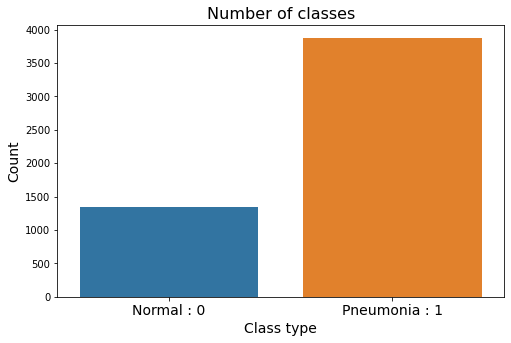

In [10]:
count_result = train_data['label'].value_counts()
print('Total : ', len(train_data))
print(count_result)

plt.figure(figsize=(8,5))
sns.countplot(x = 'label', data =  train_data)
plt.title('Number of classes', fontsize=16)
plt.xlabel('Class type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(len(count_result.index)), 
           ['Normal : 0', 'Pneumonia : 1'], 
           fontsize=14)
plt.show()

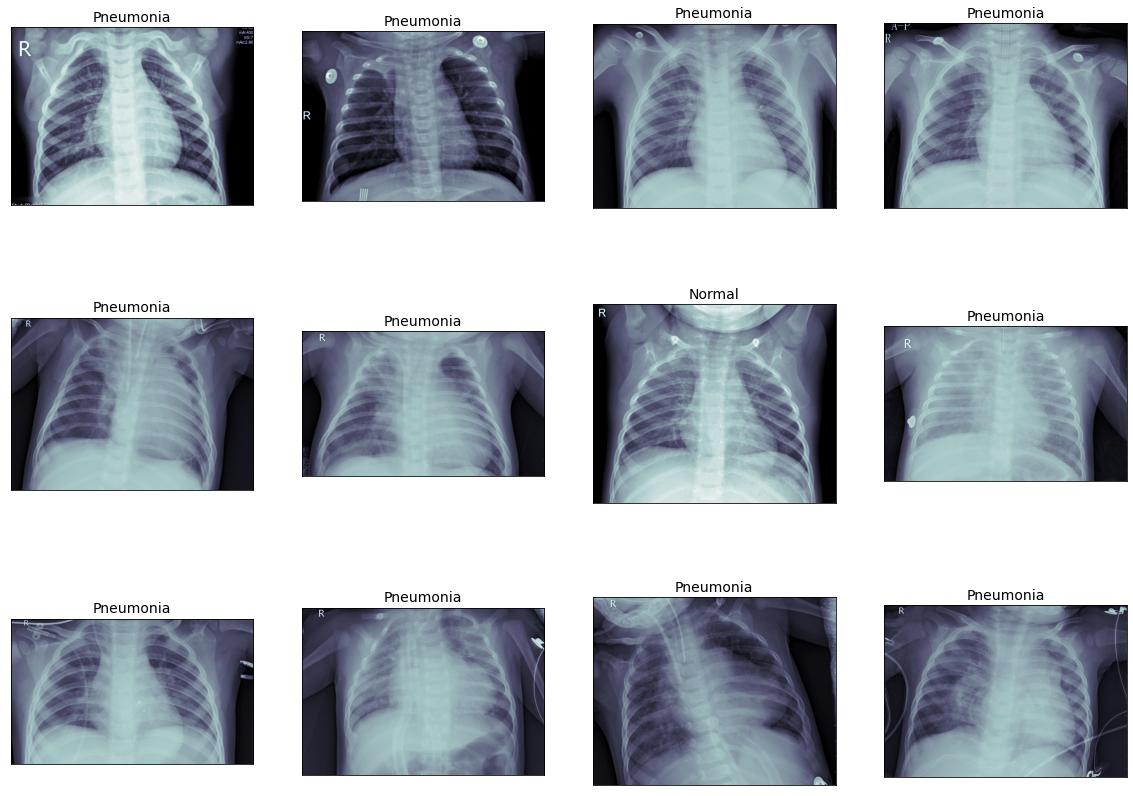

In [11]:
fig, ax = plt.subplots(3, 4, figsize=(20,15))
for i, axi in enumerate(ax.flat):
    image = imread(train_data.image[i])
    axi.imshow(image, cmap='bone')
    axi.set_title('Normal' if train_data.label[i] == 0 else 'Pneumonia',
                  fontsize=14)
    axi.set(xticks=[], yticks=[])

In [12]:
train_data.to_numpy().shape

(5216, 2)

In [13]:
import cv2

In [14]:
def data_input(dataset):
    for image in dataset:
        im = cv2.imread(str(image))
        im = cv2.resize(im, (224,224))
        if im.shape[2] == 1:
            im = np.dstack([im, im, im])
        x_image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        x_image = x_image.astype(np.float32)/255.
        return x_image

In [15]:
def load_data(files_dir='/train'):
    # list of the paths of all the image files
    normal = Path(INPUT_PATH + files_dir + '/NORMAL').glob('*.jpeg')
    pneumonia = Path(INPUT_PATH + files_dir + '/PNEUMONIA').glob('*.jpeg')

    # --------------------------------------------------------------
    # Data-paths' format in (img_path, label) 
    # labels : for [ Normal cases = 0 ] & [ Pneumonia cases = 1 ]
    # --------------------------------------------------------------
    normal_data = [(image, 0) for image in normal]
    pneumonia_data = [(image, 1) for image in pneumonia]

    image_data = normal_data + pneumonia_data

    # Get a pandas dataframe for the data paths 
    image_data = pd.DataFrame(image_data, columns=['image', 'label'])
    
    # Shuffle the data 
    image_data = image_data.sample(frac=1., random_state=100).reset_index(drop=True)
     # Importing both image & label datasets...
    x_images, y_labels = ([data_input(image_data.iloc[i][:]) for i in range(len(image_data))], 
                         [image_data.iloc[i][1] for i in range(len(image_data))])

    # Convert the list into numpy arrays
    x_images = np.array(x_images)
    x_images = x_images.reshape(x_images.shape[0],x_images.shape[1]*x_images.shape[2]*x_images.shape[3])
    y_labels = np.array(y_labels)
    
    print("Total number of images: ", x_images.shape)
    print("Total number of labels: ", y_labels.shape)
    
    return x_images, y_labels

In [16]:
x_train, y_train = load_data(files_dir='/train')

print(x_train.shape)
print(y_train.shape)

Total number of images:  (5216, 150528)
Total number of labels:  (5216,)
(5216, 150528)
(5216,)


In [17]:
x_train[0].shape

(150528,)

In [18]:
x_test, y_test = load_data(files_dir='/test')
print(x_test.shape)
print(y_test.shape)

Total number of images:  (624, 150528)
Total number of labels:  (624,)
(624, 150528)
(624,)


In [19]:
x_val, y_val = load_data(files_dir='/val')

print(x_val.shape)
print(y_val.shape)

Total number of images:  (16, 150528)
Total number of labels:  (16,)
(16, 150528)
(16,)


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [21]:
ypred = model.predict(x_test)

In [22]:
from sklearn import metrics

print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

           0       0.33      0.96      0.50        81
           1       0.99      0.71      0.83       543

    accuracy                           0.75       624
   macro avg       0.66      0.84      0.66       624
weighted avg       0.91      0.75      0.79       624



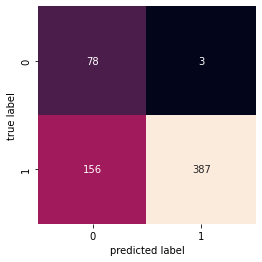

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('predicted label')
plt.ylabel('true label');